### Showing trends of cases and deaths from 7th-14th of September 

In [1]:
#Imporitng libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#### Reading and preprocessing the data

In [2]:
#Reading the dataset
covid_data=pd.read_csv('../data/covid_large.csv')


In [3]:
#Converting the datatype to datetime format
covid_data['Date'] = covid_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [4]:
covid_data.head()

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
0,AL,0,statewide unallocated,2020-01-22,0,0,0
1,AL,0,statewide unallocated,2020-01-23,0,0,0
2,AL,0,statewide unallocated,2020-01-24,0,0,0
3,AL,0,statewide unallocated,2020-01-25,0,0,0
4,AL,0,statewide unallocated,2020-01-26,0,0,0


#### Choosing Texas state data

In [31]:
covid_statedata=covid_data.loc[covid_data['State'] == 'TX']

In [32]:
covid_statedata.dtypes

State                    object
countyFIPS                int64
County Name              object
Date             datetime64[ns]
Num of Cases              int64
Num of Deaths             int64
population                int64
dtype: object

In [33]:
#Choosing one week's data from 7th-14th September
start_date=datetime(2020,9,6)
end_date=datetime(2020,9,15)
mask = (covid_statedata['Date'] > start_date) & (covid_statedata['Date'] <= end_date)

In [34]:
#Applying mask to the dataset 
covid = covid_statedata.loc[mask]


In [35]:
#Final dataset with Texas state data
covid

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
608845,TX,0,statewide unallocated,2020-09-07,0,3,0
608846,TX,0,statewide unallocated,2020-09-08,0,3,0
608847,TX,0,statewide unallocated,2020-09-09,0,3,0
608848,TX,0,statewide unallocated,2020-09-10,0,3,0
608849,TX,0,statewide unallocated,2020-09-11,0,3,0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840
669047,TX,48507,zavala county,2020-09-11,275,14,11840
669048,TX,48507,zavala county,2020-09-12,282,14,11840
669049,TX,48507,zavala county,2020-09-13,282,14,11840


In [36]:
#Setting date as the index
covid=covid.set_index('Date')

In [37]:
#Grouping by date and adding all the county numbers in TX state on the same date for both cases and deaths
covid_test=covid.groupby('Date')['Num of Deaths'].sum()
covid_test1=covid.groupby('Date')['Num of Cases'].sum()

In [38]:
covid_test

Date
2020-09-07    13485
2020-09-08    13546
2020-09-09    13686
2020-09-10    13847
2020-09-11    13991
2020-09-12    14138
2020-09-13    14185
2020-09-14    14206
Name: Num of Deaths, dtype: int64

#### Deaths trend for the week

Text(0, 0.5, 'Deaths')

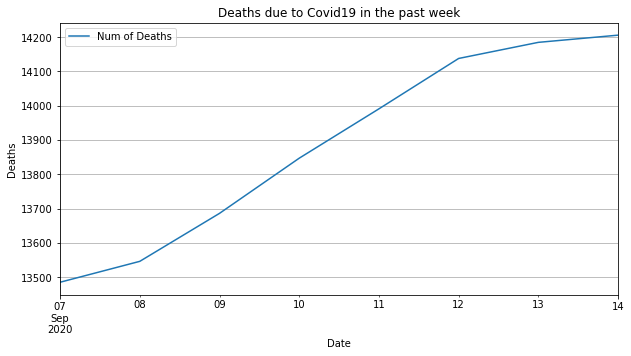

In [92]:
ax=covid_test.plot(title='Deaths due to Covid19 in the past week',figsize=(10,5), grid=True,legend=True)
ax.set_ylabel("Deaths")

#### The deaths due to Covid19 seems to be steadily increasing in the past week from 7th-13th, than they are a bit stable on 14th.

#### Cases trend for the week

Text(0, 0.5, 'COVID cases')

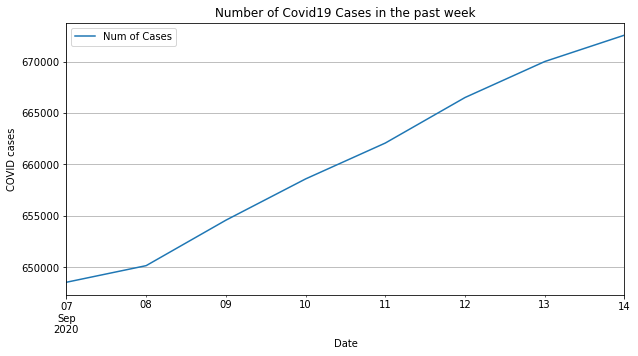

In [93]:

ax=covid_test1.plot(title='Number of Covid19 Cases in the past week',figsize=(10,5), grid=True,legend=True)
ax.set_ylabel("COVID cases")

#### The cases seems to be steadily increasing in the past week.